In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

In [2]:
road_loc = pd.read_csv("Location.csv", low_memory = False)
road_cas = pd.read_csv("Casualties.csv", low_memory = False)
road_veh = pd.read_csv("Vehicles.csv", low_memory = False)
road_desc = pd.read_csv("Description EDA.csv", low_memory = False)
road_crash = pd.read_csv("Crash.csv", low_memory = False)
road_date = pd.read_csv("DateTime EDA.csv", low_memory = False)

In [3]:
road_desc.drop("Unnamed: 0", inplace = True, axis = 1)
road_crash.drop("Unnamed: 0", inplace = True, axis = 1)
road_date.drop("Unnamed: 0", inplace = True, axis = 1)
road_loc.drop("Unnamed: 0", inplace = True, axis = 1)
road_cas.drop("Unnamed: 0", inplace = True, axis = 1)
road_veh.drop("Unnamed: 0", inplace = True, axis = 1)

In [4]:
road_desc.shape

(1106182, 9)

## Make a time series of date

In [5]:
road_date_ts = pd.read_csv("DateTime.csv", low_memory = False)
road_date_ts.drop("Unnamed: 0", inplace = True, axis = 1)
road_date_ts.head()

,date_time_id,year,month,day_of_week,day_of_month,hour,approximate
0,2012-1--7-16,2012,1.0,7.0,NaN,16.0,True
1,2012-1--7-9,2012,1.0,7.0,NaN,9.0,True
2,2012-1--3-11,2012,1.0,3.0,NaN,11.0,True
3,2012-1--3-10,2012,1.0,3.0,NaN,10.0,True
4,2012-1--3-15,2012,1.0,3.0,NaN,15.0,True


In [6]:
print(road_date_ts.shape)

road_date_ts.year.value_counts()

(127505, 7)


2014    9742
2015    9717
2016    9697
2017    9622
2018    9568
2012    8594
2013    8537
2008    8034
2009    7968
2006    7937
2007    7888
2010    7872
2011    7736
2019    4992
2003    1925
2001    1925
2005    1923
2004    1920
2002    1907
2000       1
Name: year, dtype: int64

In [7]:
road_date_ts.dropna(subset = ['day_of_month'], inplace = True)

In [8]:
print(road_date_ts.shape)

road_date_ts.year.value_counts()

(92802, 7)


2014    7791
2015    7764
2016    7747
2017    7670
2018    7599
2012    6623
2013    6592
2008    6111
2009    6035
2006    6009
2011    5987
2007    5947
2010    5935
2019    4992
Name: year, dtype: int64

In [9]:
road_date_ts.head()

,date_time_id,year,month,day_of_week,day_of_month,hour,approximate
13104,2006-1-13-5-12,2006,1.0,5.0,13.0,12.0,False
13105,2006-1-13-5-19,2006,1.0,5.0,13.0,19.0,False
13106,2006-1-14-6-12,2006,1.0,6.0,14.0,12.0,False
13107,2006-1-14-6-11,2006,1.0,6.0,14.0,11.0,False
13108,2006-1-14-6-10,2006,1.0,6.0,14.0,10.0,False


In [10]:
road_date_ts.rename({'day_of_month':'day'}, axis = 1, inplace = True)

road_date_ts.head()

,date_time_id,year,month,day_of_week,day,hour,approximate
13104,2006-1-13-5-12,2006,1.0,5.0,13.0,12.0,False
13105,2006-1-13-5-19,2006,1.0,5.0,13.0,19.0,False
13106,2006-1-14-6-12,2006,1.0,6.0,14.0,12.0,False
13107,2006-1-14-6-11,2006,1.0,6.0,14.0,11.0,False
13108,2006-1-14-6-10,2006,1.0,6.0,14.0,10.0,False


In [11]:
road_date_ts['date'] = pd.to_datetime(road_date_ts[['year', 'month', 'day','hour']])

In [12]:
road_date_ts

,date_time_id,year,month,day_of_week,day,hour,approximate,date
13104,2006-1-13-5-12,2006,1.0,5.0,13.0,12.0,False,2006-01-13 12:00:00
13105,2006-1-13-5-19,2006,1.0,5.0,13.0,19.0,False,2006-01-13 19:00:00
13106,2006-1-14-6-12,2006,1.0,6.0,14.0,12.0,False,2006-01-14 12:00:00
13107,2006-1-14-6-11,2006,1.0,6.0,14.0,11.0,False,2006-01-14 11:00:00
13108,2006-1-14-6-10,2006,1.0,6.0,14.0,10.0,False,2006-01-14 10:00:00
...,...,...,...,...,...,...,...,...
127500,2019-5-2-4-22,2019,5.0,4.0,2.0,22.0,False,2019-05-02 22:00:00
127501,2012-9-6-4-2,2012,9.0,4.0,6.0,2.0,False,2012-09-06 02:00:00
127502,2012-11-7-3-19,2012,11.0,3.0,7.0,19.0,False,2012-11-07 19:00:00
127503,2013-6-17-1-12,2013,6.0,1.0,17.0,12.0,False,2013-06-17 12:00:00


In [13]:
road_date_ts.set_index('date', inplace = True)

road_date_ts.head()

,date_time_id,year,month,day_of_week,day,hour,approximate
date,,,,,,,
2006-01-13 12:00:00,2006-1-13-5-12,2006,1.0,5.0,13.0,12.0,False
2006-01-13 19:00:00,2006-1-13-5-19,2006,1.0,5.0,13.0,19.0,False
2006-01-14 12:00:00,2006-1-14-6-12,2006,1.0,6.0,14.0,12.0,False
2006-01-14 11:00:00,2006-1-14-6-11,2006,1.0,6.0,14.0,11.0,False
2006-01-14 10:00:00,2006-1-14-6-10,2006,1.0,6.0,14.0,10.0,False


In [14]:
road_date_ts.drop('approximate',inplace = True, axis = 1)

In [15]:
# Got a time series down to the hour

## Join all tables to Crash (ID column) so they're all ready

In [16]:
road_crash.shape

(1519455, 6)

In [17]:
road_crash.isnull().sum()

crash_id               0
lat_long               0
date_time_id           0
description_id         0
vehicles_id        71400
casualties_id     212390
dtype: int64

In [18]:
road_desc.shape

(1106182, 9)

In [19]:
road_desc.head()

,description_id,severity,speed_limit,intersection,road_position_horizontal,road_position_vertical,weather,lighting,traffic_controls
0,0,property_damage,60,0,straight,level,fine,daylight,none
1,1,property_damage,50,0,straight,level,fine,daylight,none
2,2,property_damage,100,0,straight,slope,fine,daylight,none
3,3,property_damage,60,1,straight,level,fine,daylight,stop_sign
4,4,property_damage,60,1,straight,level,fine,daylight,traffic_lights


In [20]:
desc_crash = pd.merge(road_desc, road_crash, on='description_id', how='inner')
date_crash = pd.merge(road_date, road_crash, on='date_time_id', how='inner')
cas_crash = pd.merge(road_cas, road_crash, on='casualties_id', how='inner')
veh_crash = pd.merge(road_veh, road_crash, on='vehicles_id', how='inner')
loc_crash = pd.merge(road_loc, road_crash, on = 'lat_long', how = 'inner')

In [21]:
print(f"Desc shape = {desc_crash.shape}")
print(f"Date shape = {date_crash.shape}")
print(f"Cas shape = {cas_crash.shape}")
print(f"Veh shape = {veh_crash.shape}")
print(f"Loc shape = {loc_crash.shape}")

Desc shape = (1106182, 14)
Date shape = (845134, 13)
Cas shape = (1519455, 10)
Veh shape = (1590855, 24)
Loc shape = (16788470, 13)


In [22]:
loc_crash.state.value_counts()

SA     15101547
NZ       703438
QLD      328303
ACT      314285
VIC      189960
WA       150937
Name: state, dtype: int64

In [23]:
loc_crash.isnull().sum()

lat_long                        0
latitude                 15135578
longitude                14984641
country                         0
state                           0
local_government_area      498000
statistical_area         15756729
suburb                    1044350
crash_id                        0
date_time_id                    0
description_id                  0
vehicles_id                324407
casualties_id              465222
dtype: int64

In [23]:
loc_crash2 = loc_crash[['lat_long','country','state','crash_id','date_time_id','description_id','vehicles_id','casualties_id']]

In [24]:
loc_crash2.isnull().sum()

lat_long               0
country                0
state                  0
crash_id               0
date_time_id           0
description_id         0
vehicles_id       324407
casualties_id     465222
dtype: int64

## Vehicle type and datetime

In [24]:
veh_date = pd.merge(date_crash, road_veh, on = 'vehicles_id', how = 'inner')

In [25]:
veh_date.shape

(910002, 31)

In [26]:
veh_date.head()

,date_time_id,year,month,day_of_week,hour,weekend,season,season_le,crash_id,lat_long,...,truck_large,bus,taxi,bicycle,scooter,pedestrian,inanimate,train,tram,vehicle_other
0,2012-1--7-16,2012,1,7,16,1,summer,2,SA2012-1-21/08/2019,"(-34.914968707994774, 138.62326191400015)",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-1--7-16,2012,1,7,16,1,summer,2,SA2012-1624-21/08/2019,"(-34.77765590345357, 138.6238241797441)",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-1--3-10,2012,1,3,10,0,summer,2,QLD292125,"(-27.546335072, 153.086241548)",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-1--3-10,2012,1,3,10,0,summer,2,QLD292125,"(-27.546335072, 153.086241548)",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-1--3-10,2012,1,3,10,0,summer,2,QLD275388,"(-16.7917962, 145.688236004)",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
veh_date.columns

Index(['date_time_id', 'year', 'month', 'day_of_week', 'hour', 'weekend',
       'season', 'season_le', 'crash_id', 'lat_long', 'description_id',
       'vehicles_id', 'casualties_id', 'animals', 'car_sedan', 'car_utility',
       'car_van', 'car_4x4', 'car_station_wagon', 'motor_cycle', 'truck_small',
       'truck_large', 'bus', 'taxi', 'bicycle', 'scooter', 'pedestrian',
       'inanimate', 'train', 'tram', 'vehicle_other'],
      dtype='object')

In [28]:
veh_date.drop(veh_date[veh_date['year']==2019].index, axis = 0, inplace = True)

In [29]:
veh_date['cars'] = veh_date['car_sedan'] + veh_date['car_utility'] + veh_date['car_van'] + veh_date['car_4x4'] + veh_date['car_station_wagon']

veh_date['2_wheel_motor'] = veh_date['motor_cycle'] + veh_date['scooter']

In [30]:
veh_date_grouped = veh_date.groupby('year')['2_wheel_motor'].sum()

In [31]:
veh_date_grouped

year
2001    1415.0
2002    1498.0
2003    1551.0
2004    1559.0
2005    1764.0
2006    3856.0
2007    4075.0
2008    4253.0
2009    3763.0
2010    3532.0
2011    3541.0
2012    4194.0
2013    4630.0
2014    6312.0
2015    6183.0
2016    5858.0
2017    5297.0
2018    5361.0
Name: 2_wheel_motor, dtype: float64

Text(0, 0.5, 'Crash Count')

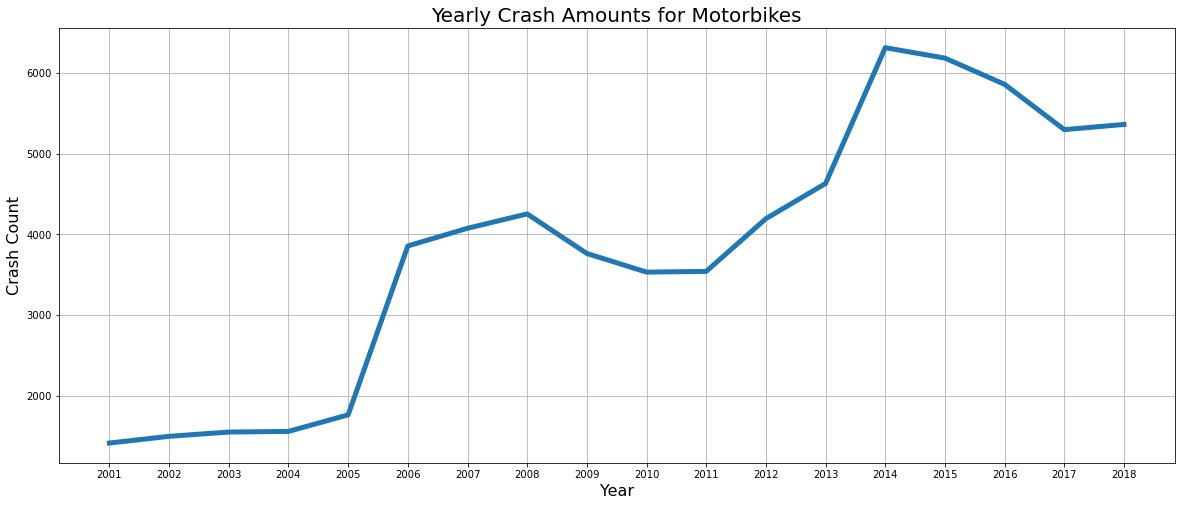

In [32]:
veh_date_grouped.plot(figsize = (20,8), linewidth = 5)
plt.grid()
plt.title("Yearly Crash Amounts for Motorbikes", size = 20)
plt.xlabel("Year", size = 16)
plt.xticks(range(2001, 2019, 1))
plt.ylabel("Crash Count", size = 16)

In [33]:
veh_date_tidy = veh_date.drop(['car_sedan', 'car_utility',
       'car_van', 'car_4x4', 'car_station_wagon', 'motor_cycle', 'scooter','truck_small',
       'truck_large','vehicle_other','train','tram'], axis = 1)

veh_date_tidy.head()

,date_time_id,year,month,day_of_week,hour,weekend,season,season_le,crash_id,lat_long,...,vehicles_id,casualties_id,animals,bus,taxi,bicycle,pedestrian,inanimate,cars,2_wheel_motor
0,2012-1--7-16,2012,1,7,16,1,summer,2,SA2012-1-21/08/2019,"(-34.914968707994774, 138.62326191400015)",...,1c1b,0c,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2012-1--7-16,2012,1,7,16,1,summer,2,SA2012-1624-21/08/2019,"(-34.77765590345357, 138.6238241797441)",...,1c1b,1c1m,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2012-1--3-10,2012,1,3,10,0,summer,2,QLD292125,"(-27.546335072, 153.086241548)",...,1c1b,1c1m,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2012-1--3-10,2012,1,3,10,0,summer,2,QLD292125,"(-27.546335072, 153.086241548)",...,1c1b,1c1m,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2012-1--3-10,2012,1,3,10,0,summer,2,QLD275388,"(-16.7917962, 145.688236004)",...,1c1b,1c1m,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [34]:
veh_date_tidy.columns

Index(['date_time_id', 'year', 'month', 'day_of_week', 'hour', 'weekend',
       'season', 'season_le', 'crash_id', 'lat_long', 'description_id',
       'vehicles_id', 'casualties_id', 'animals', 'bus', 'taxi', 'bicycle',
       'pedestrian', 'inanimate', 'cars', '2_wheel_motor'],
      dtype='object')

In [35]:
veh_date_cas = pd.merge(veh_date_tidy, road_cas, on = 'casualties_id', how = 'inner')

veh_date_cas.shape

(889717, 25)

In [36]:
veh_date_cas.columns

Index(['date_time_id', 'year', 'month', 'day_of_week', 'hour', 'weekend',
       'season', 'season_le', 'crash_id', 'lat_long', 'description_id',
       'vehicles_id', 'casualties_id', 'animals', 'bus', 'taxi', 'bicycle',
       'pedestrian', 'inanimate', 'cars', '2_wheel_motor', 'casualties',
       'fatalities', 'serious_injuries', 'minor_injuries'],
      dtype='object')

In [37]:
veh_date_cas.drop(['date_time_id', 'season', 'season_le', 'crash_id', 'lat_long', 
                   'vehicles_id', 'casualties_id', 'animals', 'bus', 'taxi', 'inanimate'], axis = 1, inplace = True)

In [38]:
veh_date_cas.head()

,year,month,day_of_week,hour,weekend,description_id,bicycle,pedestrian,cars,2_wheel_motor,casualties,fatalities,serious_injuries,minor_injuries
0,2012,1,7,16,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2012,1,4,11,0,13,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2012,1,2,17,0,976,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2012,1,3,13,0,15,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2012,1,4,16,0,18,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Check whether a number on different vehicles means a casualty or just an entry

In [39]:
veh_date_cas['mb_casualties'] = (veh_date_cas['2_wheel_motor'] > 0.0)

In [40]:
veh_date_cas.isnull().sum()

year                     0
month                    0
day_of_week              0
hour                     0
weekend                  0
description_id           0
bicycle              58431
pedestrian           58431
cars                 58431
2_wheel_motor        58431
casualties          264384
fatalities          264384
serious_injuries    264384
minor_injuries      264384
mb_casualties            0
dtype: int64

In [41]:
veh_date_cas_desc = pd.merge(veh_date_cas, road_desc, on = 'description_id', how= 'inner')
veh_date_cas_desc.shape

(441619, 23)

In [42]:
veh_date_cas_desc.isnull().sum()

year                        0
month                       0
day_of_week                 0
hour                        0
weekend                     0
description_id              0
bicycle                     0
pedestrian                  0
cars                        0
2_wheel_motor               0
casualties                  0
fatalities                  0
serious_injuries            0
minor_injuries              0
mb_casualties               0
severity                    0
speed_limit                 0
intersection                0
road_position_horizontal    0
road_position_vertical      0
weather                     0
lighting                    0
traffic_controls            0
dtype: int64

In [43]:
veh_date_cas_desc.sample(20)

,year,month,day_of_week,hour,weekend,description_id,bicycle,pedestrian,cars,2_wheel_motor,...,minor_injuries,mb_casualties,severity,speed_limit,intersection,road_position_horizontal,road_position_vertical,weather,lighting,traffic_controls
415622,2006,11,2,12,0,1252143,0.0,0.0,2.0,0.0,...,2.0,False,serious_injury,50,0,curved_view_obscure,level,fine,daylight,none
384457,2004,12,7,17,1,1087545,0.0,0.0,2.0,0.0,...,2.0,False,minor_injury,60,0,curved_view_obscure,slope,rain,daylight,none
169715,2010,12,1,8,0,1211776,1.0,0.0,1.0,0.0,...,1.0,False,minor_injury,60,0,straight,slope,fine,daylight,none
189900,2015,8,4,11,0,65855,0.0,0.0,2.0,0.0,...,1.0,False,minor_injury,50,1,straight,level,fine,daylight,stop_sign
37380,2003,9,3,14,0,1124495,0.0,0.0,2.0,0.0,...,0.0,False,property_damage,70,0,straight,level,fine,daylight,none
258154,2007,11,2,8,0,1176924,0.0,0.0,1.0,0.0,...,1.0,False,minor_injury,100,0,straight,level,rain,daylight,none
385995,2008,3,2,10,0,1123851,0.0,0.0,2.0,0.0,...,2.0,False,minor_injury,60,1,straight,level,rain,daylight,giveway_sign
178772,2012,3,4,20,0,1048705,0.0,0.0,2.0,0.0,...,1.0,False,minor_injury,60,1,straight,level,rain,darkness_lit,traffic_lights
126459,2012,6,4,1,0,11597,0.0,0.0,1.0,0.0,...,0.0,False,property_damage,80,1,straight,level,fine,darkness_not_lit,none
24765,2014,1,5,15,0,40424,0.0,0.0,2.0,0.0,...,0.0,False,property_damage,60,1,straight,level,fine,daylight,traffic_lights


In [44]:
veh_date_cas_desc[veh_date_cas_desc['mb_casualties'] == True]

,year,month,day_of_week,hour,weekend,description_id,bicycle,pedestrian,cars,2_wheel_motor,...,minor_injuries,mb_casualties,severity,speed_limit,intersection,road_position_horizontal,road_position_vertical,weather,lighting,traffic_controls
120469,2012,1,3,15,0,726,0.0,0.0,1.0,1.0,...,0.0,True,property_damage,60,1,straight,level,fine,daylight,none
120470,2012,1,5,16,0,1509,0.0,0.0,1.0,1.0,...,0.0,True,property_damage,60,1,straight,level,fine,daylight,none
120471,2012,1,6,15,1,11661,0.0,0.0,1.0,1.0,...,0.0,True,property_damage,60,1,straight,level,fine,daylight,giveway_sign
120472,2012,1,1,13,0,1248,0.0,0.0,1.0,1.0,...,0.0,True,property_damage,50,1,straight,level,fine,daylight,giveway_sign
120473,2012,1,3,6,0,987,0.0,0.0,1.0,1.0,...,0.0,True,property_damage,60,1,straight,level,fine,daylight,traffic_lights
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441272,2018,9,4,18,0,1039893,0.0,0.0,1.0,1.0,...,3.0,True,fatality,70,1,straight,level,fine,darkness_lit,traffic_lights
441359,2010,6,4,18,0,1295631,0.0,0.0,0.0,1.0,...,1.0,True,fatality,60,1,straight,level,fine,darkness_lit,traffic_lights
441416,2017,10,7,19,1,98037,0.0,0.0,1.0,1.0,...,3.0,True,fatality,90,1,straight,level,fine,daylight,stop_sign
441580,2013,9,4,16,0,1033724,0.0,0.0,0.0,1.0,...,7.0,True,fatality,50,0,curved_view_obscure,slope,fine,daylight,none


In [45]:
veh_date_cas_desc.drop(veh_date_cas_desc[veh_date_cas_desc['year']==2001].index, axis = 0, inplace = True)

In [46]:
hello = veh_date_cas_desc.drop(['year','month','day_of_week','hour','weekend'], axis = 1)
hello[hello['mb_casualties'] == True].sample(20)

,description_id,bicycle,pedestrian,cars,2_wheel_motor,casualties,fatalities,serious_injuries,minor_injuries,mb_casualties,severity,speed_limit,intersection,road_position_horizontal,road_position_vertical,weather,lighting,traffic_controls
353989,1260382,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,True,serious_injury,80,0,straight,level,fine,daylight,none
359396,1206918,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,True,serious_injury,60,0,straight,level,fine,daylight,none
280422,1070159,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,True,minor_injury,100,0,curved_view_open,dip,fine,daylight,none
280026,1051597,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,True,minor_injury,60,0,straight,level,fine,daylight,none
280626,1188404,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,True,minor_injury,50,1,straight,slope,fine,daylight,none
362811,1297106,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,True,serious_injury,50,0,straight,level,fine,daylight,none
274621,1271550,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,True,minor_injury,50,0,straight,level,fog,daylight,none
273378,88122,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,True,minor_injury,60,0,straight,level,fine,daylight,none
272208,1289571,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,True,minor_injury,50,1,straight,level,fine,daylight,traffic_lights
272032,1084769,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,True,minor_injury,60,1,straight,level,fine,daylight,giveway_sign


### Excellent, a number in vehicles column does NOT necessarily mean an injury

In [47]:
mb_mod = veh_date_cas_desc[veh_date_cas_desc['2_wheel_motor'] > 0.0]
print(mb_mod.shape)
mb_mod.sample(20)

(32915, 23)


,year,month,day_of_week,hour,weekend,description_id,bicycle,pedestrian,cars,2_wheel_motor,...,minor_injuries,mb_casualties,severity,speed_limit,intersection,road_position_horizontal,road_position_vertical,weather,lighting,traffic_controls
272418,2014,4,6,12,1,44213,0.0,0.0,1.0,1.0,...,1.0,True,minor_injury,60,1,straight,level,fine,daylight,giveway_sign
271999,2013,4,5,14,0,27769,0.0,0.0,1.0,1.0,...,1.0,True,minor_injury,50,0,straight,level,fine,daylight,none
366521,2004,11,7,10,1,1103024,0.0,0.0,0.0,1.0,...,0.0,True,serious_injury,100,0,straight,slope,fine,daylight,none
414107,2009,5,4,17,0,1177310,0.0,0.0,2.0,1.0,...,0.0,True,fatality,50,1,straight,dip,fine,dawn_dusk,none
364703,2011,2,7,10,1,1168425,0.0,0.0,0.0,1.0,...,0.0,True,serious_injury,60,0,curved_view_obscure,slope,fine,daylight,none
356056,2007,9,6,13,1,1012419,0.0,0.0,1.0,1.0,...,0.0,True,serious_injury,60,0,curved_view_obscure,level,fine,daylight,none
357408,2002,5,5,20,0,1160312,0.0,0.0,1.0,1.0,...,0.0,True,serious_injury,60,0,straight,level,fine,darkness_not_lit,none
283313,2003,11,6,7,1,1247174,0.0,0.0,0.0,1.0,...,1.0,True,minor_injury,70,0,curved_view_open,slope,fine,daylight,none
121383,2018,10,5,11,0,112018,0.0,0.0,1.0,1.0,...,0.0,True,property_damage,50,0,straight,level,fine,daylight,none
272159,2013,12,6,13,1,1252112,0.0,0.0,1.0,1.0,...,1.0,True,minor_injury,50,0,straight,level,fine,daylight,none


In [53]:
mb_speed_cas = mb_mod.groupby(['speed_limit','severity'])['2_wheel_motor'].sum()

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.,
        9000.]),
 <a list of 10 Text major ticklabel objects>)

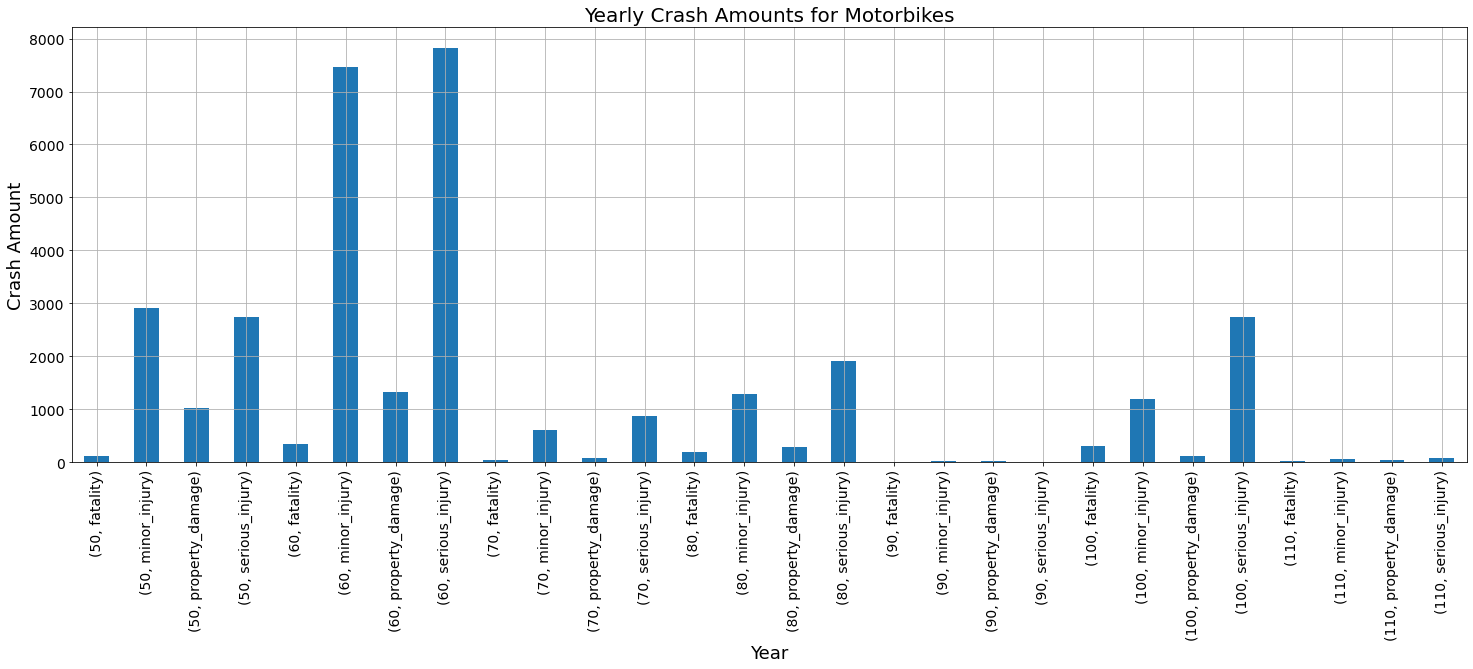

In [54]:
mb_speed_cas.plot(kind = 'bar', figsize = (25,8), linewidth = 5)
plt.grid()
plt.title("Yearly Crash Amounts for Motorbikes", size = 20)
plt.ylabel('Crash Amount', size = 18)
plt.xlabel('Year', size = 18)
plt.xticks(size = 14)
plt.yticks(size = 14)

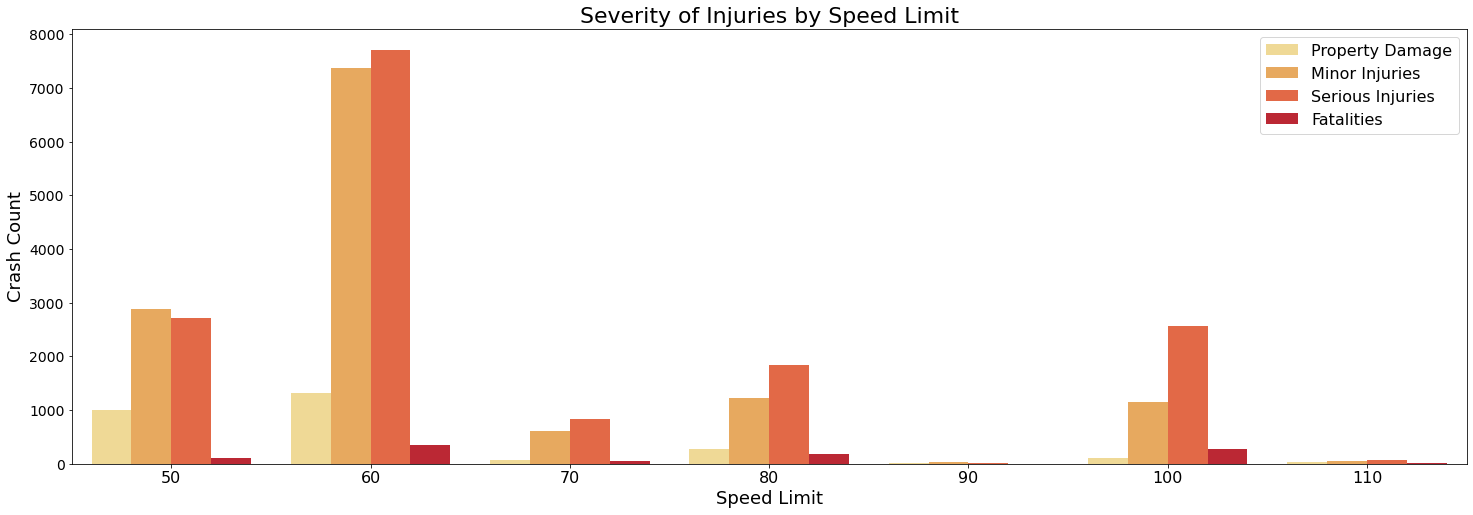

In [72]:
plt.figure(figsize = (25,8))
sns.countplot(data = mb_mod, x = 'speed_limit', hue = 'severity', palette = "YlOrRd")

plt.title("Severity of Injuries by Speed Limit", size = 22)
plt.xlabel("Speed Limit", size = 18)
plt.xticks(size = 16)
plt.ylabel("Crash Count", size = 18)
plt.yticks(size = 14)
plt.legend(['Property Damage','Minor Injuries','Serious Injuries','Fatalities'], fontsize = 16)

In [152]:
mb_mod.columns

Index(['year', 'month', 'day_of_week', 'hour', 'weekend', 'description_id',
       'bicycle', 'pedestrian', 'cars', '2_wheel_motor', 'casualties',
       'fatalities', 'serious_injuries', 'minor_injuries', 'mb_casualties',
       'severity', 'speed_limit', 'intersection', 'road_position_horizontal',
       'road_position_vertical', 'weather', 'lighting', 'traffic_controls'],
      dtype='object')

In [113]:
mb_mod.to_csv("Motorbike Only.csv", sep = ',')

In [73]:
mb_mod2 = mb_mod.drop(mb_mod[mb_mod['year']==2001].index, axis = 0)

In [74]:
mb_casualty_grouped = mb_mod2.groupby('year')[['casualties']].sum()

In [75]:
mb_casualty_grouped

,casualties
year,
2002,1609.0
2003,1668.0
2004,1633.0
2005,1883.0
2006,2083.0
2007,2135.0
2008,2156.0
2009,1722.0
2010,1639.0


(array([1500., 1600., 1700., 1800., 1900., 2000., 2100., 2200., 2300.,
        2400.]),
 <a list of 10 Text major ticklabel objects>)

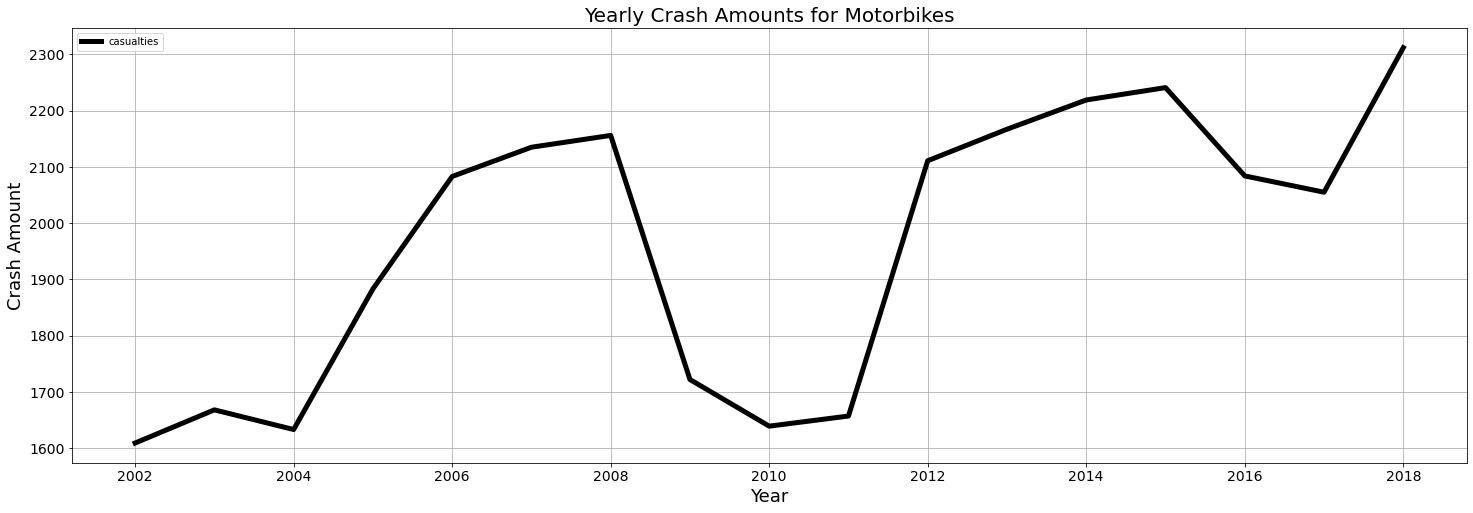

In [76]:
mb_casualty_grouped.plot(kind = 'line', figsize = (25,8), linewidth = 5, color = 'black')
plt.grid()
plt.title("Yearly Crash Amounts for Motorbikes", size = 20)
plt.ylabel('Crash Amount', size = 18)
plt.xlabel('Year', size = 18)
plt.xticks(size = 14)
plt.yticks(size = 14)

In [77]:
mb_casualty_grouped2 = veh_date_cas_desc.groupby('year')[['casualties']].sum()

In [78]:
mb_severity_grouped2 = veh_date_cas_desc.groupby(['severity','year'])[['2_wheel_motor']].sum()

In [79]:
mb_severity_grouped2

2_wheel_motor
severity       year               
fatality       2002           68.0
               2003           55.0
               2004           52.0
               2005           66.0
               2006           64.0
...                            ...
serious_injury 2014         1062.0
               2015         1070.0
               2016          995.0
               2017         1016.0
               2018         1191.0

[67 rows x 1 columns]

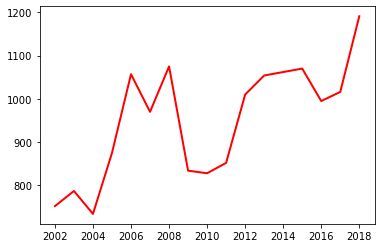

In [80]:
plt.plot(mb_severity_grouped2.loc['serious_injury'], color = 'red', linewidth = 2)

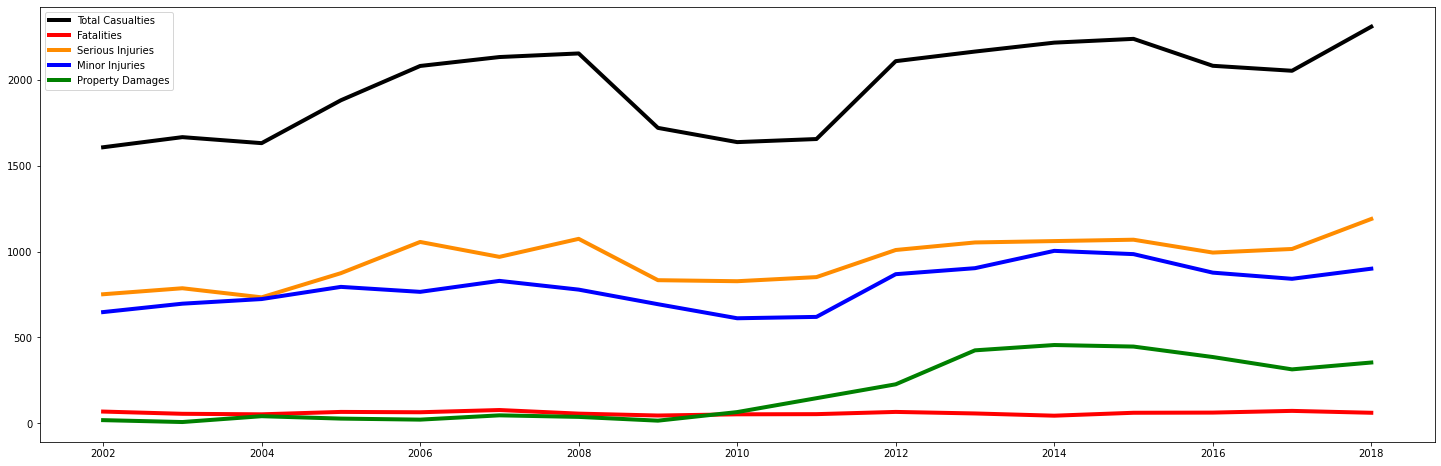

In [81]:
plt.figure(figsize = (25,8))
plt.plot(mb_casualty_grouped, color = 'black', linewidth = 4)
plt.plot(mb_severity_grouped2.loc['fatality'], color = 'red', linewidth = 4)
plt.plot(mb_severity_grouped2.loc['serious_injury'], color = 'darkorange', linewidth = 4)
plt.plot(mb_severity_grouped2.loc['minor_injury'], color = 'blue', linewidth = 4)
plt.plot(mb_severity_grouped2.loc['property_damage'], color = 'green', linewidth = 4)
plt.legend(['Total Casualties','Fatalities','Serious Injuries','Minor Injuries','Property Damages'])
plt.show()

In [82]:
mb_severity_grouped = mb_mod2.groupby(['severity','year'])[['2_wheel_motor']].sum()

In [83]:
mb_severity_grouped

2_wheel_motor
severity       year               
fatality       2002           68.0
               2003           55.0
               2004           52.0
               2005           66.0
               2006           64.0
...                            ...
serious_injury 2014         1062.0
               2015         1070.0
               2016          995.0
               2017         1016.0
               2018         1191.0

[67 rows x 1 columns]

In [137]:
#minor = mb_severity_grouped.drop(index = ['serious_injury',''])

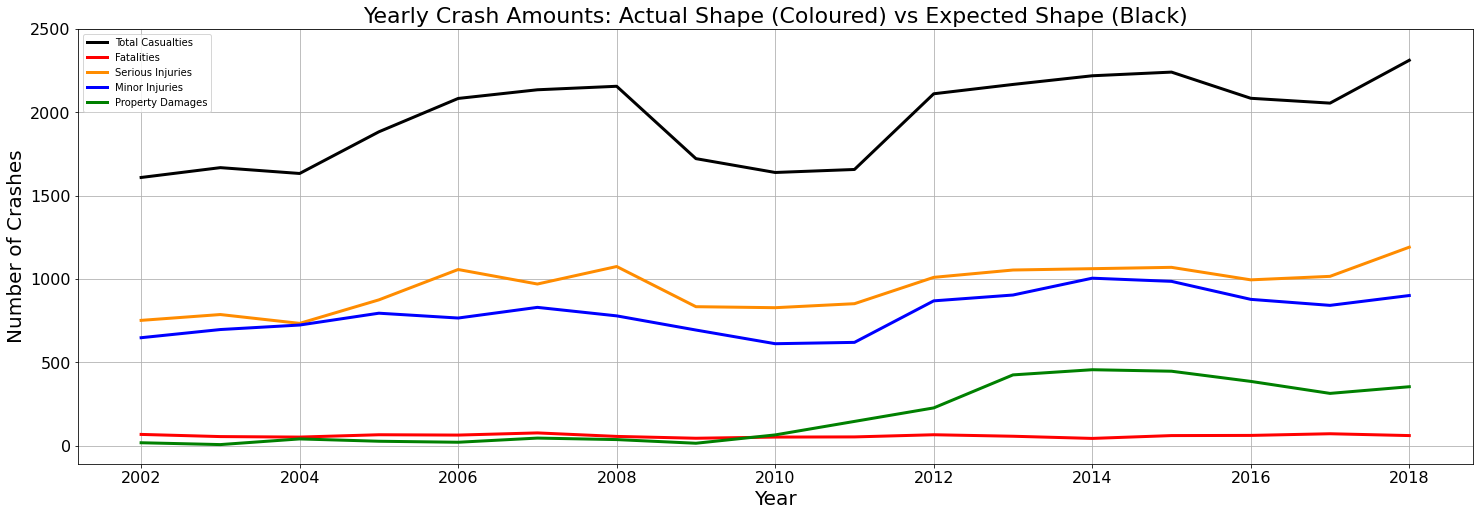

In [85]:
plt.figure(figsize = (25,8))
plt.plot(mb_casualty_grouped, color = 'black', linewidth = 3)
plt.plot(mb_severity_grouped.loc['fatality'], color = 'red', linewidth = 3)
plt.plot(mb_severity_grouped.loc['serious_injury'], color = 'darkorange', linewidth = 3)
plt.plot(mb_severity_grouped.loc['minor_injury'], color = 'blue', linewidth = 3)
plt.plot(mb_severity_grouped.loc['property_damage'], color = 'green', linewidth = 3)
plt.legend(['Total Casualties','Fatalities','Serious Injuries','Minor Injuries','Property Damages'])
plt.title('Yearly Crash Amounts: Actual Shape (Coloured) vs Expected Shape (Black)', size = 22)
plt.ylabel('Number of Crashes', size = 20)
plt.yticks(range(0, 3000, 500),size = 16)
plt.xlabel('Year', size = 20)
plt.xticks(size = 16)
plt.grid(which = 'both')
#plt.legend(" ", loc = 'upper left')
plt.show()

In [231]:
mb_weekly_grouped = mb_mod2.groupby(['day_of_week'])[['2_wheel_motor']].sum()

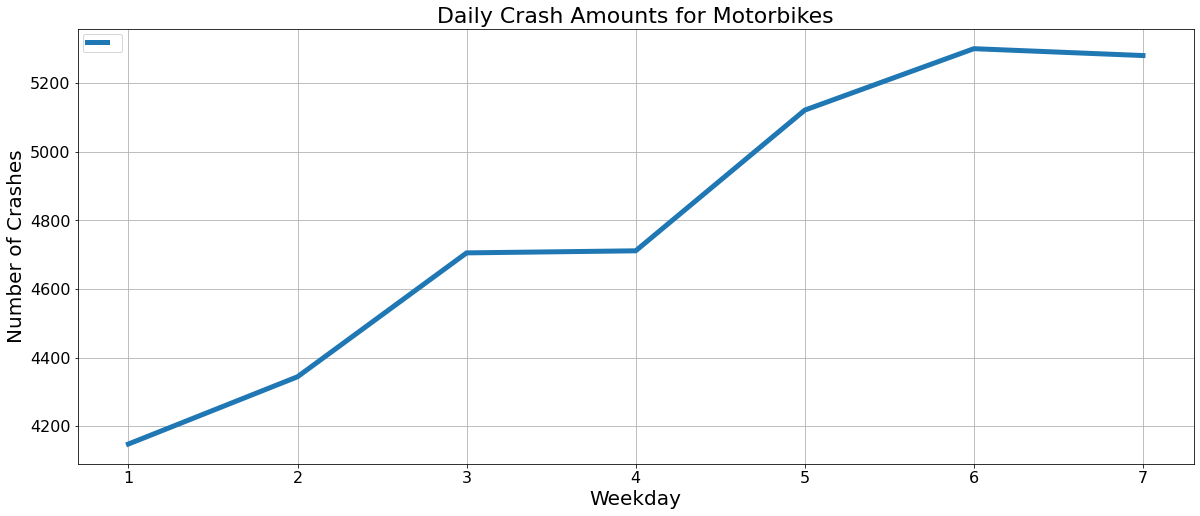

In [236]:
mb_weekly_grouped.plot(kind = 'line', figsize = (20,8), linewidth = 5)
plt.title('Daily Crash Amounts for Motorbikes', size = 22)
plt.ylabel('Number of Crashes', size = 20)
plt.yticks(size = 16)
plt.xlabel('Weekday', size = 20)
plt.xticks(size = 16)
plt.grid(which = 'both')
plt.legend(" ", loc = 'upper left')

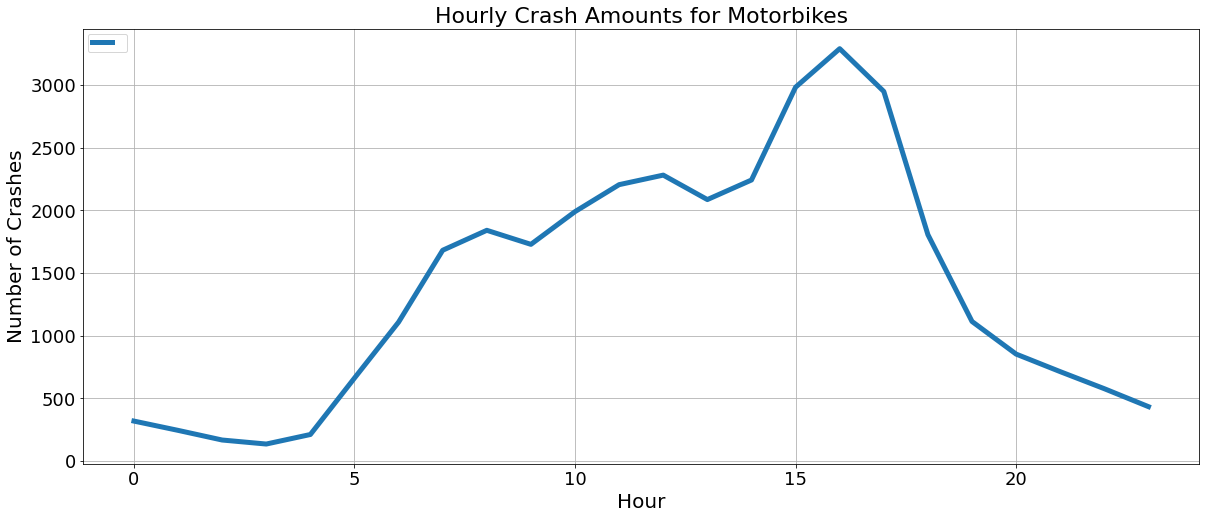

In [238]:
mb_hourly_grouped = mb_mod2.groupby(['hour'])[['2_wheel_motor']].sum()
mb_hourly_grouped.plot(kind = 'line', figsize = (20,8), linewidth = 5)
plt.title('Hourly Crash Amounts for Motorbikes', size = 22)
plt.ylabel('Number of Crashes', size = 20)
plt.yticks(size = 18)
plt.xlabel('Hour', size = 20)
plt.xticks(size = 18)
plt.grid(which = 'both')
plt.legend(" ", loc = 'upper left')

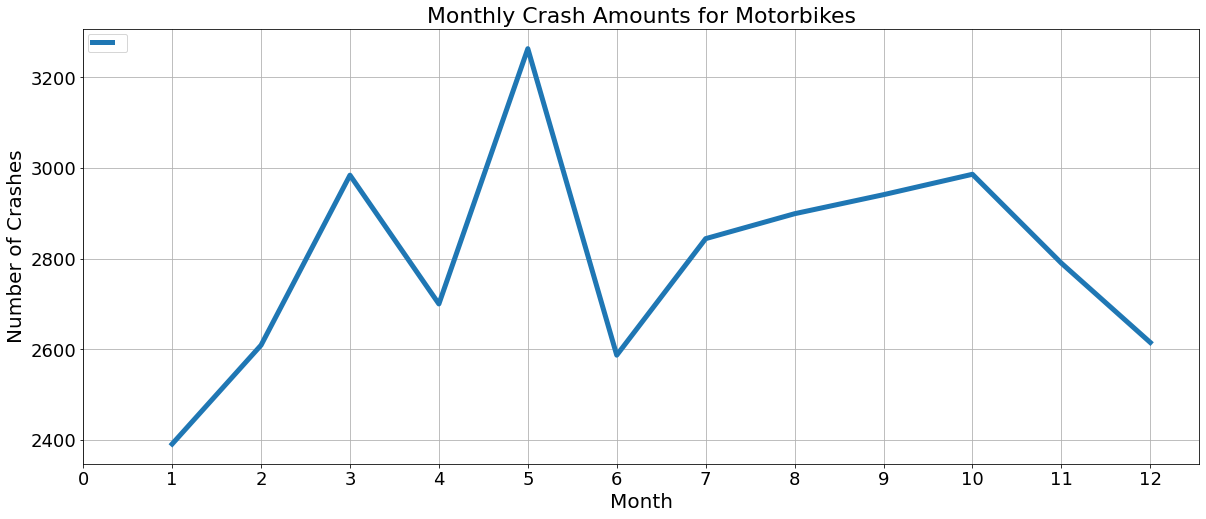

In [242]:
mb_speed_grouped = mb_mod2.groupby(['speed_limit'])[['2_wheel_motor']].sum()
mb_speed_grouped.plot(kind = 'line', figsize = (20,8), linewidth = 5)
plt.title('Monthly Crash Amounts for Motorbikes', size = 22)
plt.ylabel('Number of Crashes', size = 20)
plt.yticks(size = 18)
plt.xlabel('Month', size = 20)
plt.xticks(range(13), size = 18)
plt.grid(which = 'both')
plt.legend(" ", loc = 'upper left')

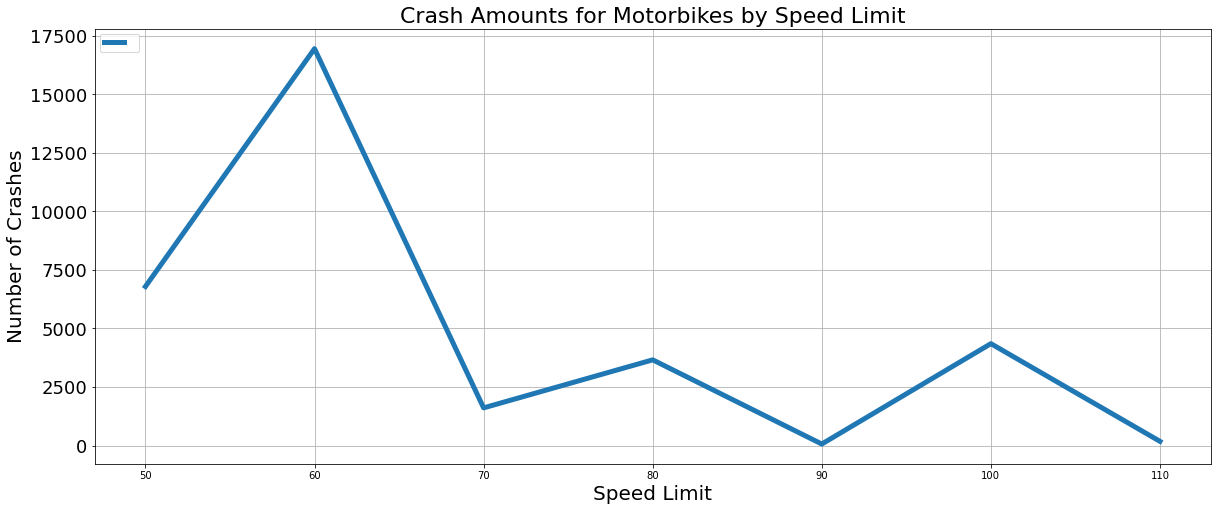

In [244]:
mb_speed_grouped = mb_mod2.groupby(['speed_limit'])[['2_wheel_motor']].sum()
mb_speed_grouped.plot(kind = 'line', figsize = (20,8), linewidth = 5)
plt.title('Crash Amounts for Motorbikes by Speed Limit', size = 22)
plt.ylabel('Number of Crashes', size = 20)
plt.yticks(size = 18)
plt.xlabel('Speed Limit', size = 20)
#plt.xticks(range(13), size = 18)
plt.grid(which = 'both')
plt.legend(" ", loc = 'upper left')

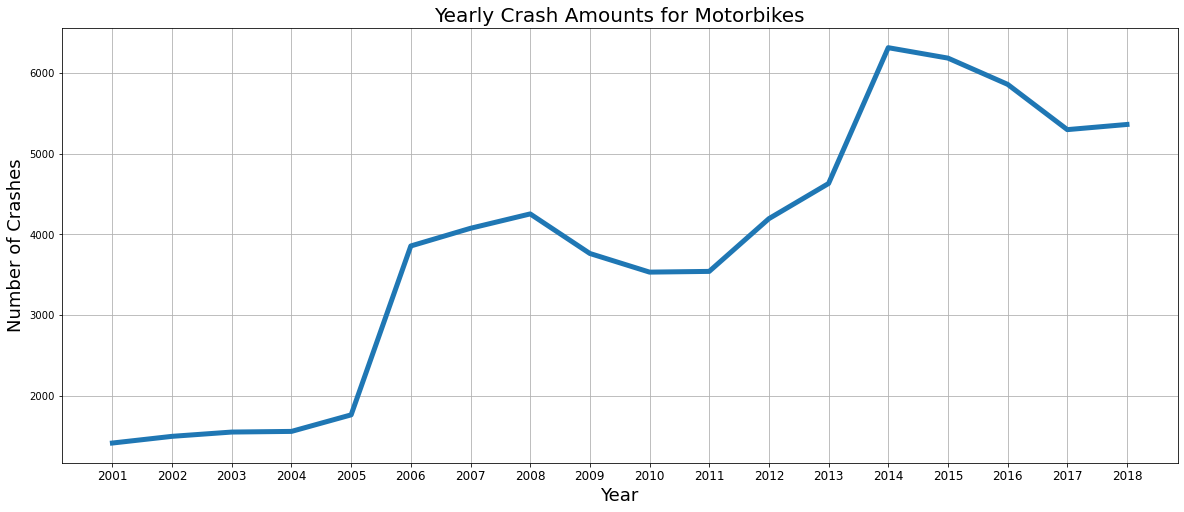

In [201]:
veh_year_bikes = veh_date_tidy.groupby('year')['2_wheel_motor'].sum()

veh_year_bikes.plot(kind = 'line', figsize = (20,8), linewidth = 5)
plt.title('Yearly Crash Amounts for Motorbikes', size = 20)
plt.ylabel('Number of Crashes', size = 18)
plt.xlabel('Year', size = 18)
plt.xticks(range(2001,2019,1), rotation = 0, size = 12)
plt.grid(which = 'both')
#plt.legend(['Trucks','Bicycles','2-Wheeled (powered)','Pedestrians'])

In [59]:
veh_date_tidy_grouped = veh_date_tidy.groupby('day_of_week')['car_full', 'truck_full',
       'bus', 'taxi', 'bicycle', '2_wheel_motor', 'pedestrian'].sum()

C:\Users\wibby\anaconda3\envs\Python 37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [60]:
veh_date_tidy_grouped

,car_full,truck_full,bus,taxi,bicycle,2_wheel_motor,pedestrian
day_of_week,,,,,,,
1,129845.0,9360.0,1499.0,747.0,6135.0,8326.0,2487.0
2,138870.0,10041.0,1532.0,783.0,7397.0,8722.0,2984.0
3,144765.0,9781.0,1602.0,765.0,7188.0,9194.0,2918.0
4,151296.0,9915.0,1598.0,874.0,7204.0,9289.0,3059.0
5,161739.0,9786.0,1730.0,980.0,6454.0,10116.0,3449.0
6,125980.0,3511.0,943.0,969.0,5248.0,11522.0,2597.0
7,98309.0,2071.0,742.0,923.0,4093.0,11473.0,1969.0


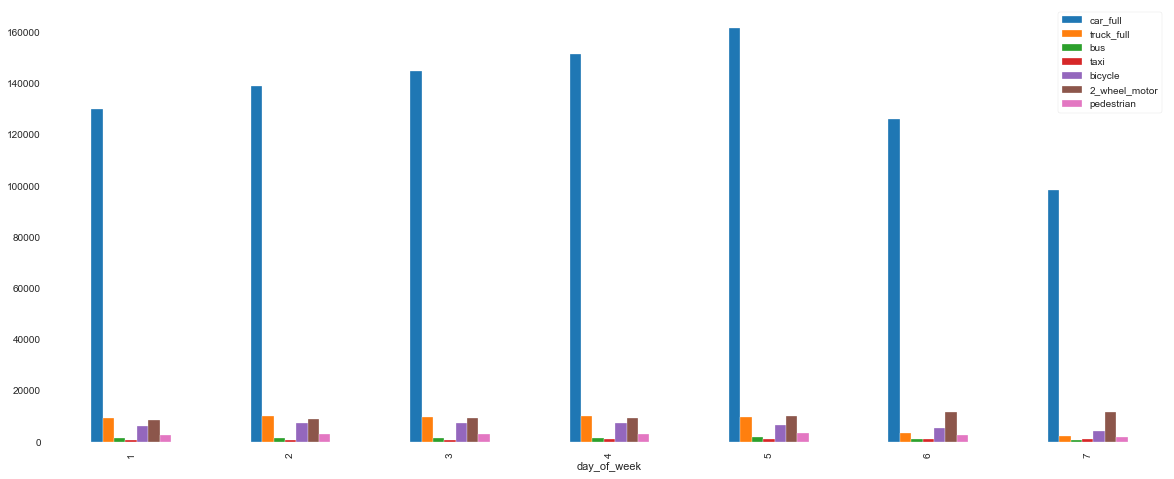

In [94]:
veh_date_tidy_grouped.plot(kind = 'bar', figsize = (20,8))

In [66]:
veh_date_day_grouped = veh_date.groupby('day_of_week')['car_sedan', 'car_utility',
       'car_van', 'car_4x4', 'car_station_wagon', 'motor_cycle', 'truck_small',
       'truck_large', 'bus', 'taxi', 'bicycle', 'scooter', 'pedestrian'].sum()

C:\Users\wibby\anaconda3\envs\Python 37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [67]:
veh_date_day_grouped

,car_sedan,car_utility,car_van,car_4x4,car_station_wagon,motor_cycle,truck_small,truck_large,bus,taxi,bicycle,scooter,pedestrian
day_of_week,,,,,,,,,,,,,
1,109503.0,6296.0,1950.0,53.0,12043.0,7970.0,1661.0,7699.0,1499.0,747.0,6135.0,356.0,2487.0
2,117252.0,6378.0,2005.0,59.0,13176.0,8329.0,1843.0,8198.0,1532.0,783.0,7397.0,393.0,2984.0
3,122206.0,6714.0,2094.0,56.0,13695.0,8801.0,1796.0,7985.0,1602.0,765.0,7188.0,393.0,2918.0
4,127737.0,7057.0,2153.0,85.0,14264.0,8850.0,1822.0,8093.0,1598.0,874.0,7204.0,439.0,3059.0
5,137374.0,7359.0,2135.0,87.0,14784.0,9731.0,1872.0,7914.0,1730.0,980.0,6454.0,385.0,3449.0
6,108482.0,5149.0,1083.0,69.0,11197.0,11237.0,665.0,2846.0,943.0,969.0,5248.0,285.0,2597.0
7,84101.0,4047.0,787.0,37.0,9337.0,11256.0,343.0,1728.0,742.0,923.0,4093.0,217.0,1969.0


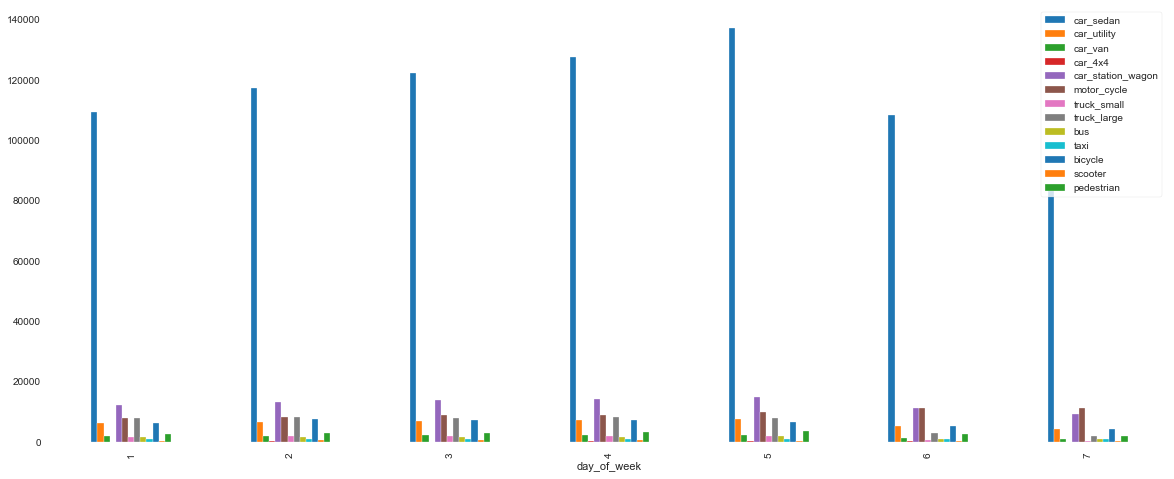

In [68]:
veh_date_day_grouped.plot(kind = 'bar', figsize = (20,8))

C:\Users\wibby\anaconda3\envs\Python 37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


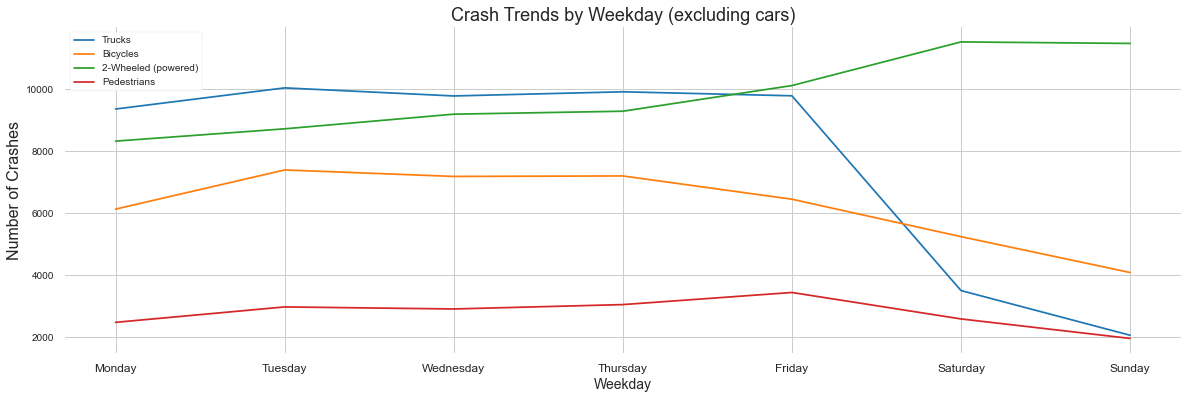

In [106]:
veh_date_tidy_grouped_nocar = veh_date_tidy.groupby('day_of_week')['truck_full', 'bicycle', '2_wheel_motor', 'pedestrian'].sum()
veh_date_tidy_grouped_nocar.plot(kind = 'line', figsize = (20,6))
plt.title('Crash Trends by Weekday (excluding cars)', size = 18)
plt.ylabel('Number of Crashes', size = 16)
plt.xlabel('Weekday', size = 14)
plt.xticks([1,2,3,4,5,6,7],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation = 0, size = 12)
plt.grid(which = 'both')
plt.legend(['Trucks','Bicycles','2-Wheeled (powered)','Pedestrians'])

C:\Users\wibby\anaconda3\envs\Python 37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


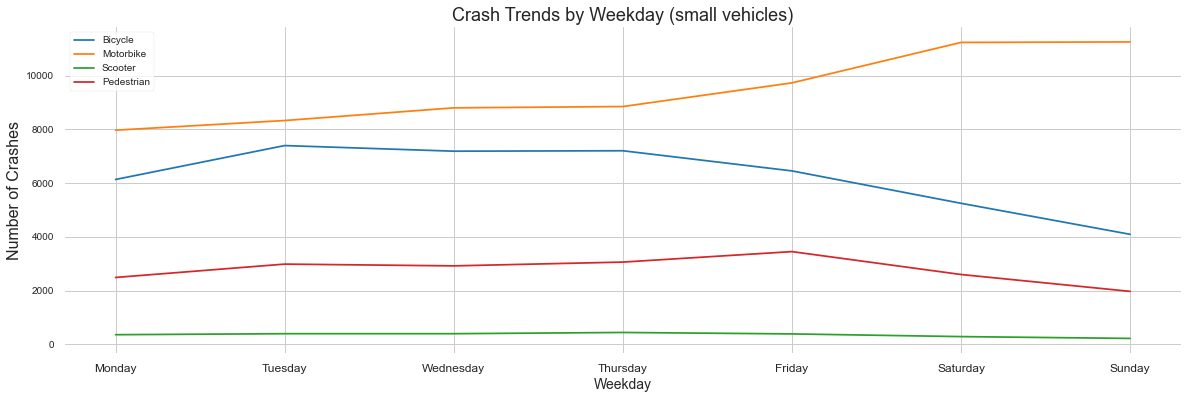

In [107]:
veh_date_grouped_nocar = veh_date.groupby('day_of_week')['bicycle', 'motor_cycle', 'scooter', 'pedestrian'].sum()
veh_date_grouped_nocar.plot(kind = 'line', figsize = (20,6))
plt.title('Crash Trends by Weekday (small vehicles)', size = 18)
plt.ylabel('Number of Crashes', size = 16)
plt.xlabel('Weekday', size = 14)
plt.xticks([1,2,3,4,5,6,7],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation = 0, size = 12)
plt.grid(which = 'both')
plt.legend(['Bicycle','Motorbike','Scooter','Pedestrian'])

C:\Users\wibby\anaconda3\envs\Python 37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


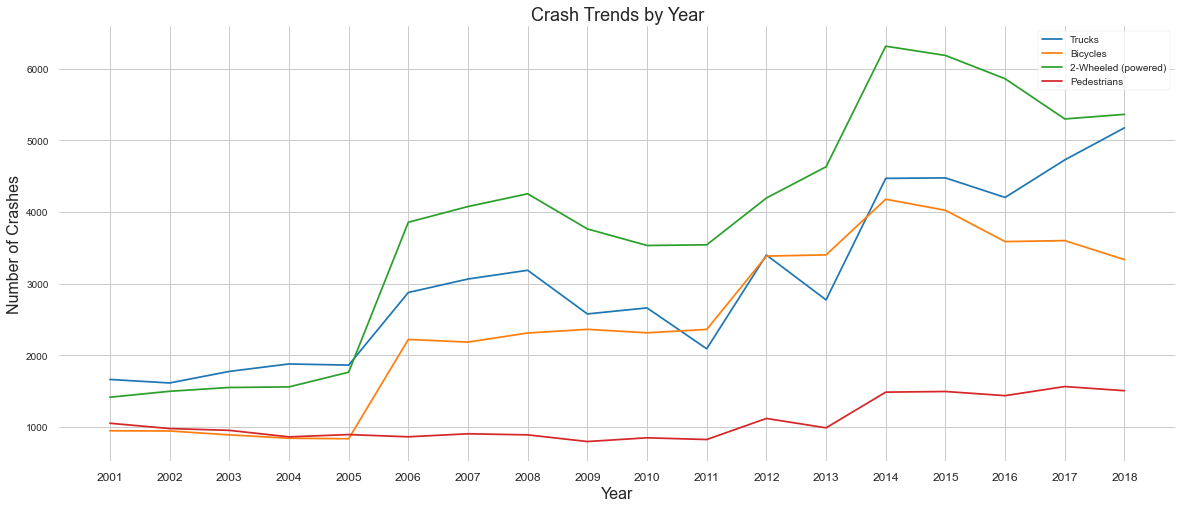

In [105]:
veh_year_bikes = veh_date_tidy.groupby('year')['truck_full', 'bicycle', '2_wheel_motor', 'pedestrian'].sum()

veh_year_bikes.plot(kind = 'line', figsize = (20,8))
plt.title('Crash Trends by Year', size = 18)
plt.ylabel('Number of Crashes', size = 16)
plt.xlabel('Year', size = 16)
plt.xticks(range(2001,2019,1), rotation = 0, size = 12)
plt.grid(which = 'both')
plt.legend(['Trucks','Bicycles','2-Wheeled (powered)','Pedestrians'])

C:\Users\wibby\anaconda3\envs\Python 37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


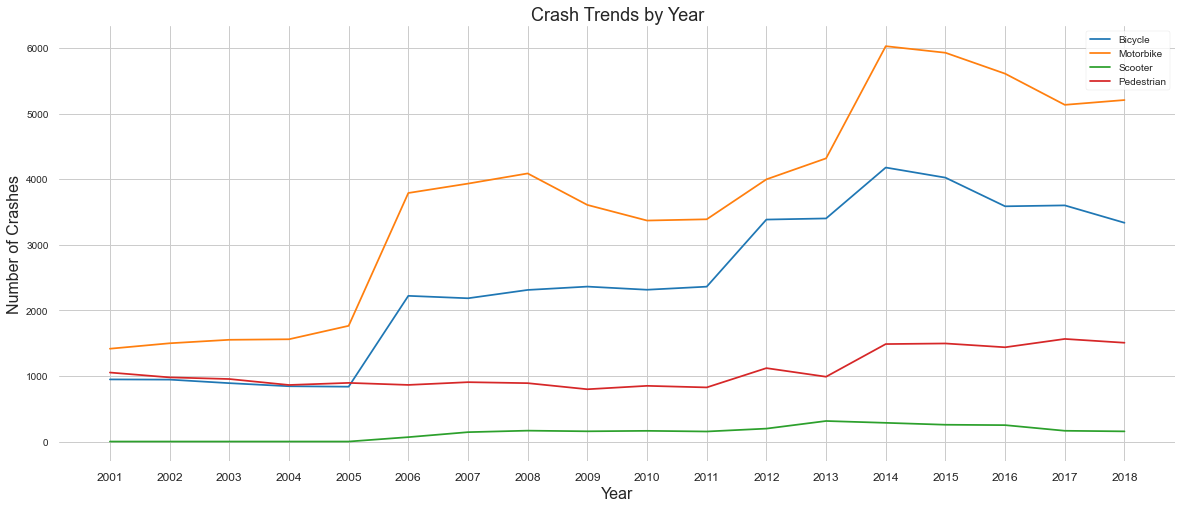

In [115]:
veh_year_bikesonly = veh_date.groupby('year')['bicycle', 'motor_cycle', 'scooter', 'pedestrian'].sum()

veh_year_bikesonly.plot(kind = 'line', figsize = (20,8))
plt.title('Crash Trends by Year', size = 18)
plt.ylabel('Number of Crashes', size = 16)
plt.xlabel('Year', size = 16)
plt.xticks(range(2001,2019,1), rotation = 0, size = 12)
plt.grid(which = 'both')
plt.legend(['Bicycle','Motorbike','Scooter','Pedestrian'])

# Menulog started in 2006, UberEats started in 2014. Look at those spikes!

C:\Users\wibby\anaconda3\envs\Python 37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


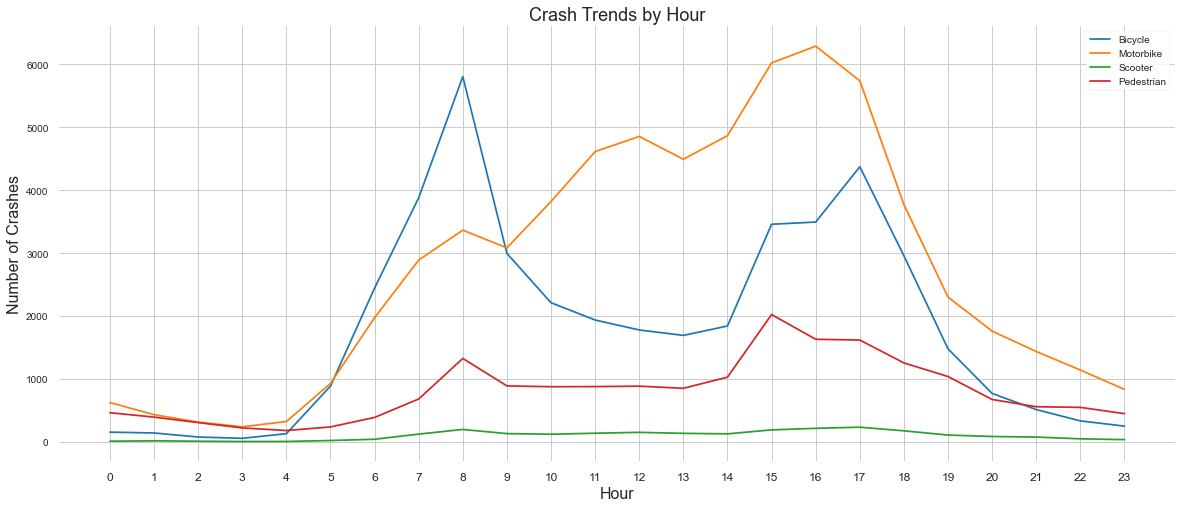

In [165]:
veh_hour_bikesonly = veh_date.groupby('hour')['bicycle', 'motor_cycle', 'scooter', 'pedestrian'].sum()

veh_hour_bikesonly.plot(kind = 'line', figsize = (20,8))
plt.title('Crash Trends by Hour', size = 18)
plt.ylabel('Number of Crashes', size = 16)
plt.xlabel('Hour', size = 16)
plt.xticks(range(0,24,1), rotation = 0, size = 12)
plt.grid(which = 'both')
plt.legend(['Bicycle','Motorbike','Scooter','Pedestrian'])

In [ ]:
# Expected a spike in casualties between 6pm and 10pm for dinner rush, unfortunately not there

### Join Casualties to Vehicles

In [119]:
veh_date.columns

Index(['date_time_id', 'year', 'month', 'day_of_week', 'hour', 'weekend',
       'season', 'season_le', 'crash_id', 'lat_long', 'description_id',
       'vehicles_id', 'casualties_id', 'animals', 'car_sedan', 'car_utility',
       'car_van', 'car_4x4', 'car_station_wagon', 'motor_cycle', 'truck_small',
       'truck_large', 'bus', 'taxi', 'bicycle', 'scooter', 'pedestrian',
       'inanimate', 'train', 'tram', 'vehicle_other', 'car_full', 'truck_full',
       '2_wheel_motor'],
      dtype='object')

In [120]:
veh_date_cas = pd.merge(veh_date, road_cas, on = 'casualties_id', how = 'inner')

veh_date_cas.shape

(889717, 38)

In [121]:
veh_date_cas.groupby

,date_time_id,year,month,day_of_week,hour,weekend,season,season_le,crash_id,lat_long,...,train,tram,vehicle_other,car_full,truck_full,2_wheel_motor,casualties,fatalities,serious_injuries,minor_injuries
0,2012-1--7-16,2012,1,7,16,1,summer,2,SA2012-1-21/08/2019,"(-34.914968707994774, 138.62326191400015)",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-1--4-11,2012,1,4,11,0,summer,2,SA2012-14-21/08/2019,"(-35.058573538711094, 138.61741011520448)",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-1--2-17,2012,1,2,17,0,summer,2,SA2012-977-21/08/2019,"(-34.95134680704066, 138.643328336807)",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-1--3-13,2012,1,3,13,0,summer,2,SA2012-16-21/08/2019,"(-34.907646731147736, 138.60119173640263)",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-1--4-16,2012,1,4,16,0,summer,2,SA2012-19-21/08/2019,"(-34.86809349925081, 138.57320510441076)",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
bikes_cas_grouped = veh_date_cas.groupby('year')['bicycle', 'motor_cycle','scooter', 'pedestrian','fatalities'].sum()

C:\Users\wibby\anaconda3\envs\Python 37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [134]:
bikes_cas_grouped

,bicycle,motor_cycle,scooter,pedestrian,fatalities
year,,,,,
2001,947.0,1415.0,0.0,1052.0,361.0
2002,944.0,1498.0,0.0,978.0,359.0
2003,890.0,1551.0,0.0,953.0,349.0
2004,843.0,1559.0,0.0,862.0,293.0
2005,836.0,1764.0,0.0,894.0,337.0
2006,2221.0,3789.0,67.0,863.0,726.0
2007,2184.0,3932.0,143.0,905.0,677.0
2008,2311.0,4087.0,166.0,890.0,678.0
2009,2362.0,3607.0,156.0,797.0,603.0


## Join Descriptions to vehicles

In [139]:
veh_date_desc = pd.merge(veh_date, road_desc, on = 'description_id', how = 'inner')

veh_date_desc.shape

(441619, 42)

In [140]:
veh_date_desc.columns

Index(['date_time_id', 'year', 'month', 'day_of_week', 'hour', 'weekend',
       'season', 'season_le', 'crash_id', 'lat_long', 'description_id',
       'vehicles_id', 'casualties_id', 'animals', 'car_sedan', 'car_utility',
       'car_van', 'car_4x4', 'car_station_wagon', 'motor_cycle', 'truck_small',
       'truck_large', 'bus', 'taxi', 'bicycle', 'scooter', 'pedestrian',
       'inanimate', 'train', 'tram', 'vehicle_other', 'car_full', 'truck_full',
       '2_wheel_motor', 'severity', 'speed_limit', 'intersection',
       'road_position_horizontal', 'road_position_vertical', 'weather',
       'lighting', 'traffic_controls'],
      dtype='object')

In [204]:
bike_date_desc_tidy = veh_date_desc[['date_time_id','year','month','day_of_week','hour','weekend','crash_id','lat_long',
                                     'description_id','vehicles_id','casualties_id','speed_limit','intersection','weather',
                                    'lighting','traffic_controls','motor_cycle','road_position_vertical','road_position_horizontal','bicycle','scooter','pedestrian','severity']]

In [206]:
bike_date_desc_tidy.shape

(441619, 23)

In [145]:
bike_severity_grouped = bike_date_desc_tidy.groupby(['year','severity'])['bicycle', 'motor_cycle','scooter', 'pedestrian'].sum()
#veh_date_cas.groupby('year')['bicycle', 'motor_cycle','scooter', 'pedestrian','fatalities'].sum()

bike_severity_grouped

C:\Users\wibby\anaconda3\envs\Python 37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


bicycle  motor_cycle  scooter  pedestrian
year severity                                                  
2001 fatality            12.0         25.0      0.0        55.0
     minor_injury       631.0        720.0      0.0       535.0
     property_damage      2.0         37.0      0.0         0.0
     serious_injury     293.0        621.0      0.0       454.0
2002 fatality             5.0         68.0      0.0        42.0
...                       ...          ...      ...         ...
2017 serious_injury     424.0       1016.0      0.0       367.0
2018 fatality            14.0         61.0      0.0        37.0
     minor_injury       803.0        853.0     48.0       464.0
     property_damage    273.0        321.0     33.0       150.0
     serious_injury     389.0       1189.0      2.0       381.0

[71 rows x 4 columns]

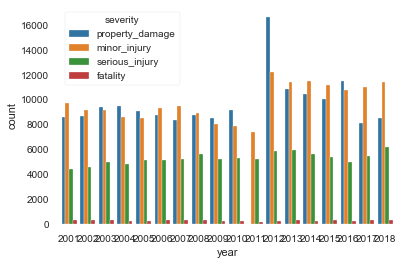

In [215]:
sns.countplot(data = cas_bikes_merged, x = 'year', hue = 'severity')

## Fully connected and joined small vehicle dataset

In [207]:
# Already have description, vehicles and datetime merged. Now add location. 
anz_bikes_merged = pd.merge(bike_date_desc_tidy, road_loc, on = 'lat_long', how = 'inner')

anz_bikes_merged.shape

(15238858, 30)

In [209]:
anz_bikes_merged.state.value_counts()

SA     14911169
QLD      327689
Name: state, dtype: int64

In [211]:
anz_bikes_merged2 = anz_bikes_merged.drop_duplicates()
anz_bikes_merged2.shape

(3834010, 30)

In [212]:
anz_bikes_merged2.state.value_counts()

SA     3506321
QLD     327689
Name: state, dtype: int64

In [ ]:
# Merging location hugely increases the row count and removes NZ and all states other than SA and QLD.
# Insights are not worth the loss of information. Do not use location.

In [210]:
# Add casualties instead, just in case i need to look at itemised injury counts
cas_bikes_merged = pd.merge(bike_date_desc_tidy, road_cas, on = 'casualties_id', how = 'inner')

cas_bikes_merged.shape

(441619, 27)

In [213]:
cas_bikes_merged.head()

,date_time_id,year,month,day_of_week,hour,weekend,crash_id,lat_long,description_id,vehicles_id,...,road_position_vertical,road_position_horizontal,bicycle,scooter,pedestrian,severity,casualties,fatalities,serious_injuries,minor_injuries
0,2012-1--7-16,2012,1,7,16,1,SA2012-1-21/08/2019,"(-34.914968707994774, 138.62326191400015)",0,1c1b,...,level,straight,1.0,0.0,0.0,property_damage,0.0,0.0,0.0,0.0
1,2012-1--4-11,2012,1,4,11,0,SA2012-14-21/08/2019,"(-35.058573538711094, 138.61741011520448)",13,1c1b,...,slope,straight,1.0,0.0,0.0,property_damage,0.0,0.0,0.0,0.0
2,2012-1--2-17,2012,1,2,17,0,SA2012-977-21/08/2019,"(-34.95134680704066, 138.643328336807)",976,1c1b,...,level,straight,1.0,0.0,0.0,property_damage,0.0,0.0,0.0,0.0
3,2012-1--3-13,2012,1,3,13,0,SA2012-16-21/08/2019,"(-34.907646731147736, 138.60119173640263)",15,1c1b,...,level,straight,1.0,0.0,0.0,property_damage,0.0,0.0,0.0,0.0
4,2012-1--4-16,2012,1,4,16,0,SA2012-19-21/08/2019,"(-34.86809349925081, 138.57320510441076)",18,1c1b,...,level,straight,1.0,0.0,0.0,property_damage,0.0,0.0,0.0,0.0


In [220]:
cas_bikes_merged.casualties.max()

32.0

In [214]:
cas_bikes_merged.to_csv('Small Vehicles Joined.csv', sep = ',')

In [216]:
cas_bikes_merged.year.value_counts()

2012    34947
2013    28534
2014    27918
2016    27472
2015    26976
2018    26557
2017    24934
2003    23835
2008    23650
2006    23628
2007    23405
2004    23312
2001    23072
2005    23037
2002    22758
2010    22689
2009    22062
2011    12833
Name: year, dtype: int64

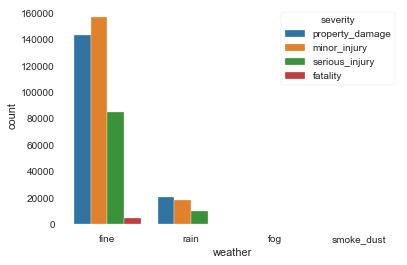

In [219]:
# Equal amount from each year, very good
sns.countplot(data = cas_bikes_merged, x = 'weather', hue = 'severity')

In [226]:
crash_by_weather = cas_bikes_merged.groupby(['severity','weather'])['bicycle', 'motor_cycle','scooter', 'pedestrian'].sum()

crash_by_weather

C:\Users\wibby\anaconda3\envs\Python 37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


bicycle  motor_cycle  scooter  pedestrian
severity        weather                                              
fatality        fine          158.0       1004.0      1.0       712.0
                fog             2.0          1.0      0.0         3.0
                rain            6.0         25.0      0.0        95.0
                smoke_dust      0.0          5.0      0.0         1.0
minor_injury    fine        11673.0      13031.0    331.0      7406.0
                fog            31.0         39.0      0.0         9.0
                rain          531.0        819.0     33.0       562.0
                smoke_dust      5.0         17.0      0.0         3.0
property_damage fine         2506.0       2474.0    310.0       356.0
                fog             0.0          2.0      0.0         0.0
                rain           61.0        120.0     15.0        18.0
                smoke_dust      0.0          2.0      0.0         0.0
serious_injury  fine         5994.0      15663.0     58.0      7020.0
                fog            14.0         94.0      0.0        34.0
                rain          304.0        912.0      7.0       610.0
                smoke_dust      8.0         49.0      0.0         7.0

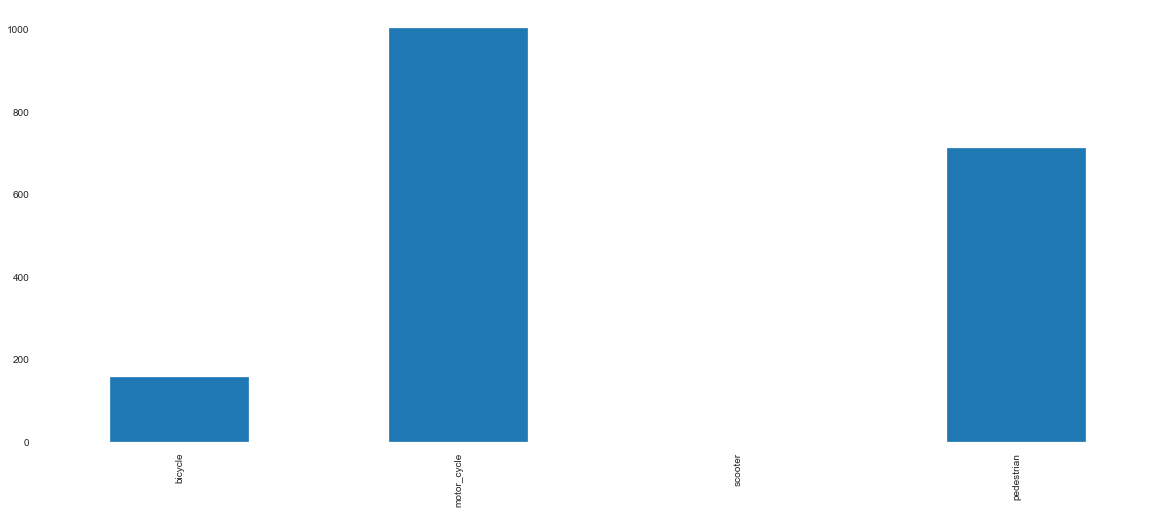

In [233]:
crash_by_weather.loc['fatality','fine'].plot(kind = 'bar',figsize = (20,8))